In [80]:
import os
import glob
import pandas as pd
import numpy as np
import argparse
import json
import random
from matplotlib import pyplot as plt
%matplotlib inline

article_type = 'dresses'
input_file_path  = '/rapid_data/myntra/myntra_data/' + article_type + '/' + article_type +  '_valid_styles.csv'
image_path  = '/rapid_data/myntra/myntra_data/' + article_type + '/' + article_type+   '_images'
attribute_map_file = '/rapid_data/myntra/myntra_data/' + article_type + '/' + article_type + '_' + 'attribute_map.txt'
attributes = ['sleeve_style', 'sleeve_length','length', 'print_pattern_type', 'neck', 'hemline', 'shape']
attributes = ['sleeve_style','sleeve_length','print_pattern_type','neck']
attributes = ['fade','distress','shade']
output_path  =  '/rapid_data/myntra/myntra_data/' + article_type
# label_map_file_name None
overall_map_file_name =  article_type +  "_multilabel_overall_map_file.csv"

train_file_suffix= "multilabel_train"
test_file_suffix ="multilabel_test"

In [81]:
data = pd.read_csv(input_file_path)

data.columns = ['style_id',  'brand', 'article_type','gender', 'color', 'image_url', \
'sleeve_style', 'sleeve_length', 'length' , 'print_pattern_type', 'neck' ,  'hemline', 'shape' ]
# data.drop(['hemline', 'shape', 'length'], axis = 1 , inplace = True)
print ('pre:' + str(data.shape) )
data = data.dropna()
print ('post:' + str(data.shape) )

# data.columns = ['style_id', 'brand', 'article_type', 'gender', 'base_colour','image_array',  'image_url',  'fade', \
# 'length', 'distress', 'shade']
# data.drop(['length'], axis = 1 , inplace = True)
# print ('pre:' + str(data.shape) )
# data = data.dropna()
# print ('pre:' + str(data.shape) )
print("data read..")
if os.path.exists(attribute_map_file):
    mappers = {}
    with open(attribute_map_file) as json_data:
        print("reading map file...")
        mappers = json.load(json_data)
        data = data.replace(mappers)

data["local_image_path"] = image_path + "/" + data["style_id"].map(str) + ".jpg"
data.to_csv(os.path.join(output_path, overall_map_file_name))
print("overall map file created")

attributes = attributes
print ('\nattributes:\n' + str(attributes))   
overall_df = data.copy()

for attribute in attributes:
    overall_df = overall_df[~overall_df[attribute].isnull()]
#         overall_df = overall_df[['style_id', 'image_url', 'local_image_path', attribute]]
#         print ('\n' + attribute + ' dataframe columns:\n'  + str(overall_df.columns) )

    label_map_file = '/rapid_data/myntra/myntra_data/' + article_type + '/' + article_type + '_' + attribute + '/' + \
    article_type + '_' + attribute +  '_label_map.txt'

    with open(label_map_file) as json_data:
        labels_dict = json.load(json_data) 

    unique_val = []
    for key in labels_dict.keys():
        unique_val.append(key)
    print (attribute)
#         print ('Unique values in old data: ' + str(len(unique_val)) )
#         print ('Pre shape of the data frame' + str(overall_df.shape) )
#         print ('Pre unique values: ' + str(len(overall_df[attribute].unique().tolist())) )
    overall_df = overall_df[overall_df[attribute].isin(unique_val)]
#         print ('Post shape of the data frame' + str(overall_df.shape) )
#         print ('Pre unique values: ' + str(len(overall_df[attribute].unique().tolist())) )

#     overall_df[attribute] = overall_df[attribute].map(labels_dict)

#         df_test[attribute] = df_test[attribute].map(labels_dict)
cols_to_keep = ['local_image_path'] + attributes
overall_df = overall_df[cols_to_keep]
# df_train = pd.DataFrame()
# df_test = pd.DataFrame()
# split = 0.8

# print ('\nSplitting data into train and test...')
# unique_prints = overall_df['print_pattern_type'].unique()
# #     print ('unique_prints' + str(unique_prints) )
# #     print ( overall_df['print_pattern_type'].value_counts() )
# for val in unique_prints:
# #         print('val:' , val)
#     temp = overall_df[overall_df['print_pattern_type'] == val].reset_index(drop = True)
#     random.seed(1)
#     train_rows = np.random.choice(temp.index, int(len(temp)* split), replace=False)
#     test_rows = [x for x in temp.index if x not in train_rows]
#     temp_train = temp.loc[train_rows]
#     temp_test = temp.loc[test_rows]
#     df_train = df_train.append(temp_train)
#     df_test = df_test.append(temp_test) 

# for attri in attributes:
#     print (attri + '_train_nunique ' + str (df_train[attri].nunique()) )
#     print (attri + '_test_nunique ' + str(df_test[attri].nunique()) )

# print  ('\nSaving final multilabel file' )
#     df_train.to_csv('/rapid_data/myntra/myntra_data/' + article_type + '/' + train_file_suffix + '.txt', sep=' ', index = False, header=False)
#     df_test.to_csv('/rapid_data/myntra/myntra_data/' + article_type + '/' +  test_file_suffix  + '.txt', sep=' ', index = False, header=False)

pre:(58916, 13)
post:(37064, 13)
data read..
reading map file...
overall map file created

attributes:
['fade', 'distress', 'shade']


KeyError: 'fade'

Text(0,0.5,'Frequency')

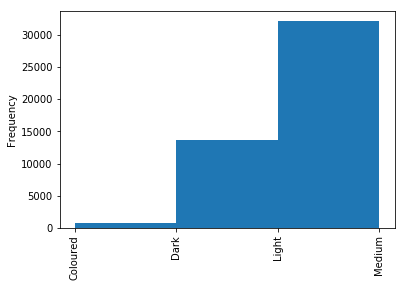

In [75]:
plt.hist(overall_df['shade'], bins = overall_df['fade'].nunique() )
plt.xticks(rotation=90)
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

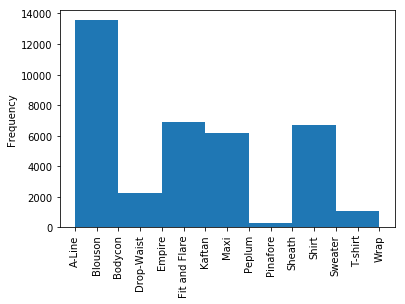

In [54]:
plt.hist(overall_df['shape'], bins = overall_df['hemline'].nunique() )
plt.xticks(rotation=90)
plt.ylabel("Frequency")